<a href="https://colab.research.google.com/github/bernia/MachineLearning/blob/master/tf_tutorials_basic_image_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

## Carga de datos

In [0]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [21]:
print(train_images.shape,train_labels.shape, test_images.shape, test_labels.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


## Preproceso

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

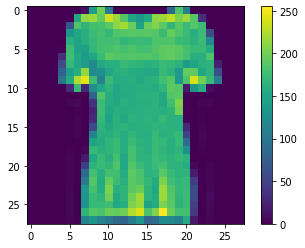

In [24]:
plt.figure()
plt.imshow(train_images[10])
plt.colorbar()
plt.grid(False)
plt.show()

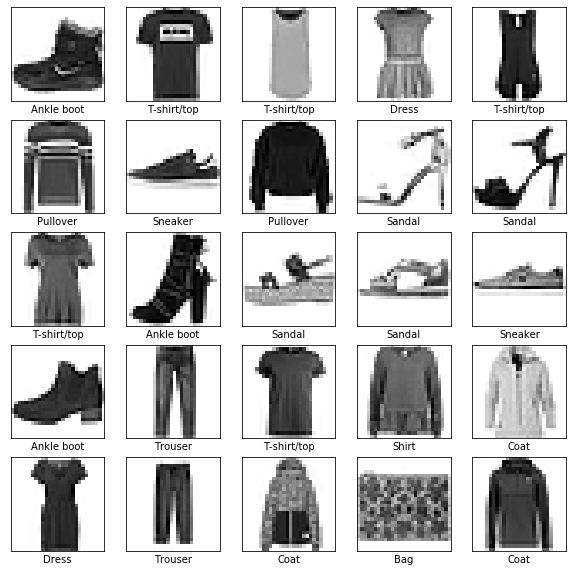

In [25]:
train_images = train_images / 255.0
test_images = test_images / 255.0

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Model

In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [30]:
model.fit(train_images,train_labels,epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 69us/sample - loss: 0.4989 - acc: 0.8249
Epoch 2/10
60000/60000 [==============================] - 4s 70us/sample - loss: 0.3716 - acc: 0.8667
Epoch 3/10
60000/60000 [==============================] - 4s 70us/sample - loss: 0.3376 - acc: 0.8776
Epoch 4/10
60000/60000 [==============================] - 4s 70us/sample - loss: 0.3112 - acc: 0.8857
Epoch 5/10
60000/60000 [==============================] - 4s 70us/sample - loss: 0.2957 - acc: 0.8913
Epoch 6/10
60000/60000 [==============================] - 4s 69us/sample - loss: 0.2808 - acc: 0.8961
Epoch 7/10
60000/60000 [==============================] - 4s 73us/sample - loss: 0.2686 - acc: 0.9002
Epoch 8/10
60000/60000 [==============================] - 4s 70us/sample - loss: 0.2567 - acc: 0.9048
Epoch 9/10
60000/60000 [==============================] - 4s 72us/sample - loss: 0.2475 - acc: 0.9074
Epoch 10/10
60000/60000 [==============================] - 

In [32]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\n Test Accuracy: ', test_acc)

10000/10000 - 0s - loss: 0.3418 - acc: 0.8836

 Test Accuracy:  0.8836


In [0]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

In [36]:
print(np.argmax(predictions[0]))

9


In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

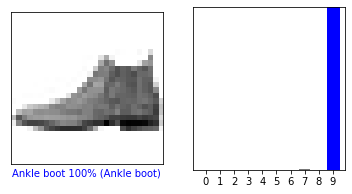

In [38]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions[i],test_labels)
plt.show()

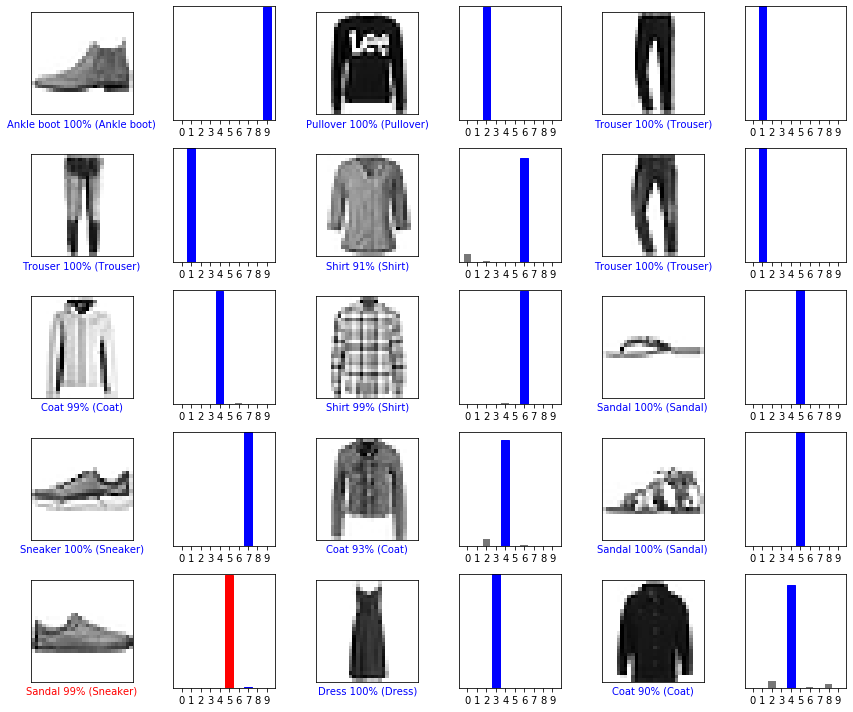

In [39]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [49]:
img = test_images[1]
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [50]:
predictions_single = probability_model.predict(img)
print(predictions_single)

[[2.5486774e-04 1.5296167e-12 9.9889922e-01 3.8228865e-09 7.7418069e-04
  1.5119071e-10 7.1634233e-05 2.6820054e-17 8.1064705e-10 2.7222577e-16]]


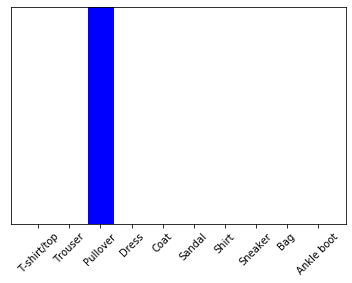

In [51]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [52]:
print('Era ' , class_names[test_labels[1]], ' y lo clasifica como ', class_names[np.argmax(predictions_single[0])])

Era  Pullover  y lo clasifica como  Pullover
